<h1>PAIRS TRADING BACKTEST</h1>

<h3>1. Run Once </h3>
install necessary packages.
After that, you need comment the above part of code

In [1]:
# import sys
# !{sys.executable} -m pip install -r ./requirements.txt

<h3>2. Imports </h3>
get classes of this system

In [2]:
from research import Researcher
from backtest import Backtester

<h3>3. Settings </h3>
Adjust the settings before run.

In [3]:
is_new_historical_data = False
is_new_backtesting = True
exchange = 'binance'
timeframe = '1d'
interval = '2 years ago'
min_correlation = 0.51

<h3>4. Research Data </h3>
Load previous data or get new data by selecting the desired timeframe, interval and minimum correlation for new data

In [4]:
research = Researcher()

if is_new_historical_data:
    # Get new research data #
    research.new_research(exchange=exchange, timeframe=timeframe, interval=interval, min_correlation=min_correlation)
    research.save_outputs()

else:
    # Load last researched data #
    research.load_research()

research.output_df

,currency1,currency2,correlation,ratio,zero_crossings
7138,ONT/USDT,XEM/USDT,0.789723,5.411158,80
5761,INJ/USDT,THETA/USDT,0.643865,1.748560,70
36,1INCH/USDT,DOT/USDT,0.671127,0.090543,69
1834,BAKE/USDT,REN/USDT,0.651303,2.026267,68
4278,DGB/USDT,VET/USDT,0.797915,0.415108,68
...,...,...,...,...,...
4617,ENJ/USDT,LPT/USDT,0.555182,0.063559,41
4441,DOT/USDT,TOMO/USDT,0.696814,14.668693,41
2844,BTS/USDT,DGB/USDT,0.696339,0.958691,41
3691,COTI/USDT,THETA/USDT,0.667666,0.074495,41


<h3>5. Backtest Data </h3>
Load previous backtest or get new backtesting by given research data to it

In [5]:
backtest = Backtester(research)

if is_new_backtesting:
    # # Do a new backtesting with researched data #
    backtest.edit_settings(open_at=2, close_at=0)
    backtest.run_backtests()
    backtest.save_outputs()

else:
    backtest.load_backtests()

backtest.results_df

,n_trades,sharperatio,max_drawdown,roi,currency1,currency2,ratio,correlation
0,46,6.147755,7.68,262.66,ONT/USDT,XEM/USDT,5.411158,0.789723
0,46,6.147755,7.68,262.66,ONT/USDT,XEM/USDT,5.411158,0.789723
0,46,5.629210,13.23,297.91,1INCH/USDT,LINA/USDT,67.862387,0.609608
0,35,5.108290,12.66,256.10,TOMO/USDT,ZEN/USDT,0.029832,0.683466
0,44,5.041033,28.85,374.93,AUDIO/USDT,TRU/USDT,4.561715,0.558026
...,...,...,...,...,...,...,...,...
0,29,0.118737,51.62,9.30,DOT/USDT,TOMO/USDT,14.668693,0.696814
0,28,0.050678,51.01,4.27,QTUM/USDT,XTZ/USDT,2.110258,0.749358
0,28,-0.159977,58.86,-11.71,ALGO/USDT,SOL/USDT,0.009201,0.688288
0,27,-0.260106,63.31,-24.07,CELR/USDT,XVG/USDT,4.680812,0.664654


<h3>6. Selecting Pairs </h3>
It removes pairs with low sharpe ratio and high draw down, and also removes same currency appearing.

In [6]:
# Removes unwanted pairs
df = backtest.results_df
df_filtered = df[(df['sharperatio'] >= 4) & (df['max_drawdown'] <= 20)]
# df_filtered = df[(df['max_drawdown'] <= 30) & (df['roi'] >= 300) & (df['sharperatio'] >= 3)]
df_unique =  df_filtered.drop_duplicates(subset='currency1', keep='first', inplace=False).drop_duplicates(subset='currency2', keep='first', inplace=False)

# In case of same currency apparition, it removes the weaker pair #
weaker_pairs = df_unique.apply(lambda x: df_unique.loc[df_unique['currency2'] == x['currency1'], 'roi'].max() >= x['roi'] or
                                         df_unique.loc[df_unique['currency1'] == x['currency2'], 'roi'].max() >= x['roi'], axis=1)
df_final = df_unique[~weaker_pairs]
df_final

,n_trades,sharperatio,max_drawdown,roi,currency1,currency2,ratio,correlation
0,46,6.147755,7.68,262.66,ONT/USDT,XEM/USDT,5.411158,0.789723
0,46,5.629210,13.23,297.91,1INCH/USDT,LINA/USDT,67.862387,0.609608
0,35,5.108290,12.66,256.10,TOMO/USDT,ZEN/USDT,0.029832,0.683466
0,35,4.726853,16.61,287.75,COMP/USDT,XVS/USDT,12.303400,0.602318
0,33,4.694602,13.92,294.12,CELO/USDT,ICX/USDT,3.149259,0.621677
0,39,4.692812,17.21,297.43,ATA/USDT,TRU/USDT,2.095803,0.565378
0,39,4.526073,9.55,246.28,DENT/USDT,HBAR/USDT,0.014196,0.708463
0,35,4.326800,12.14,200.35,GRT/USDT,KSM/USDT,0.002343,0.721685
0,39,4.320286,11.51,324.16,ALICE/USDT,CKB/USDT,624.203700,0.548253
0,36,4.179964,16.16,286.77,BAKE/USDT,REN/USDT,2.026267,0.651303


<h3>7. Exporting Results to BOT </h3>

In [7]:
df_exports = df_final[['currency1', 'currency2', 'ratio']].copy()
df_exports['timeframe'] = timeframe
df_exports.reset_index(inplace=True, drop=True)
df_exports.to_csv('./data/outputs/bot_input.csv', index=False)
df_exports

,currency1,currency2,ratio,timeframe
0,ONT/USDT,XEM/USDT,5.411158,1d
1,1INCH/USDT,LINA/USDT,67.862387,1d
2,TOMO/USDT,ZEN/USDT,0.029832,1d
3,COMP/USDT,XVS/USDT,12.303400,1d
4,CELO/USDT,ICX/USDT,3.149259,1d
5,ATA/USDT,TRU/USDT,2.095803,1d
6,DENT/USDT,HBAR/USDT,0.014196,1d
7,GRT/USDT,KSM/USDT,0.002343,1d
8,ALICE/USDT,CKB/USDT,624.203700,1d
9,BAKE/USDT,REN/USDT,2.026267,1d


<h3>8. Visualizing Results </h3>
Of the remaining pairs on list

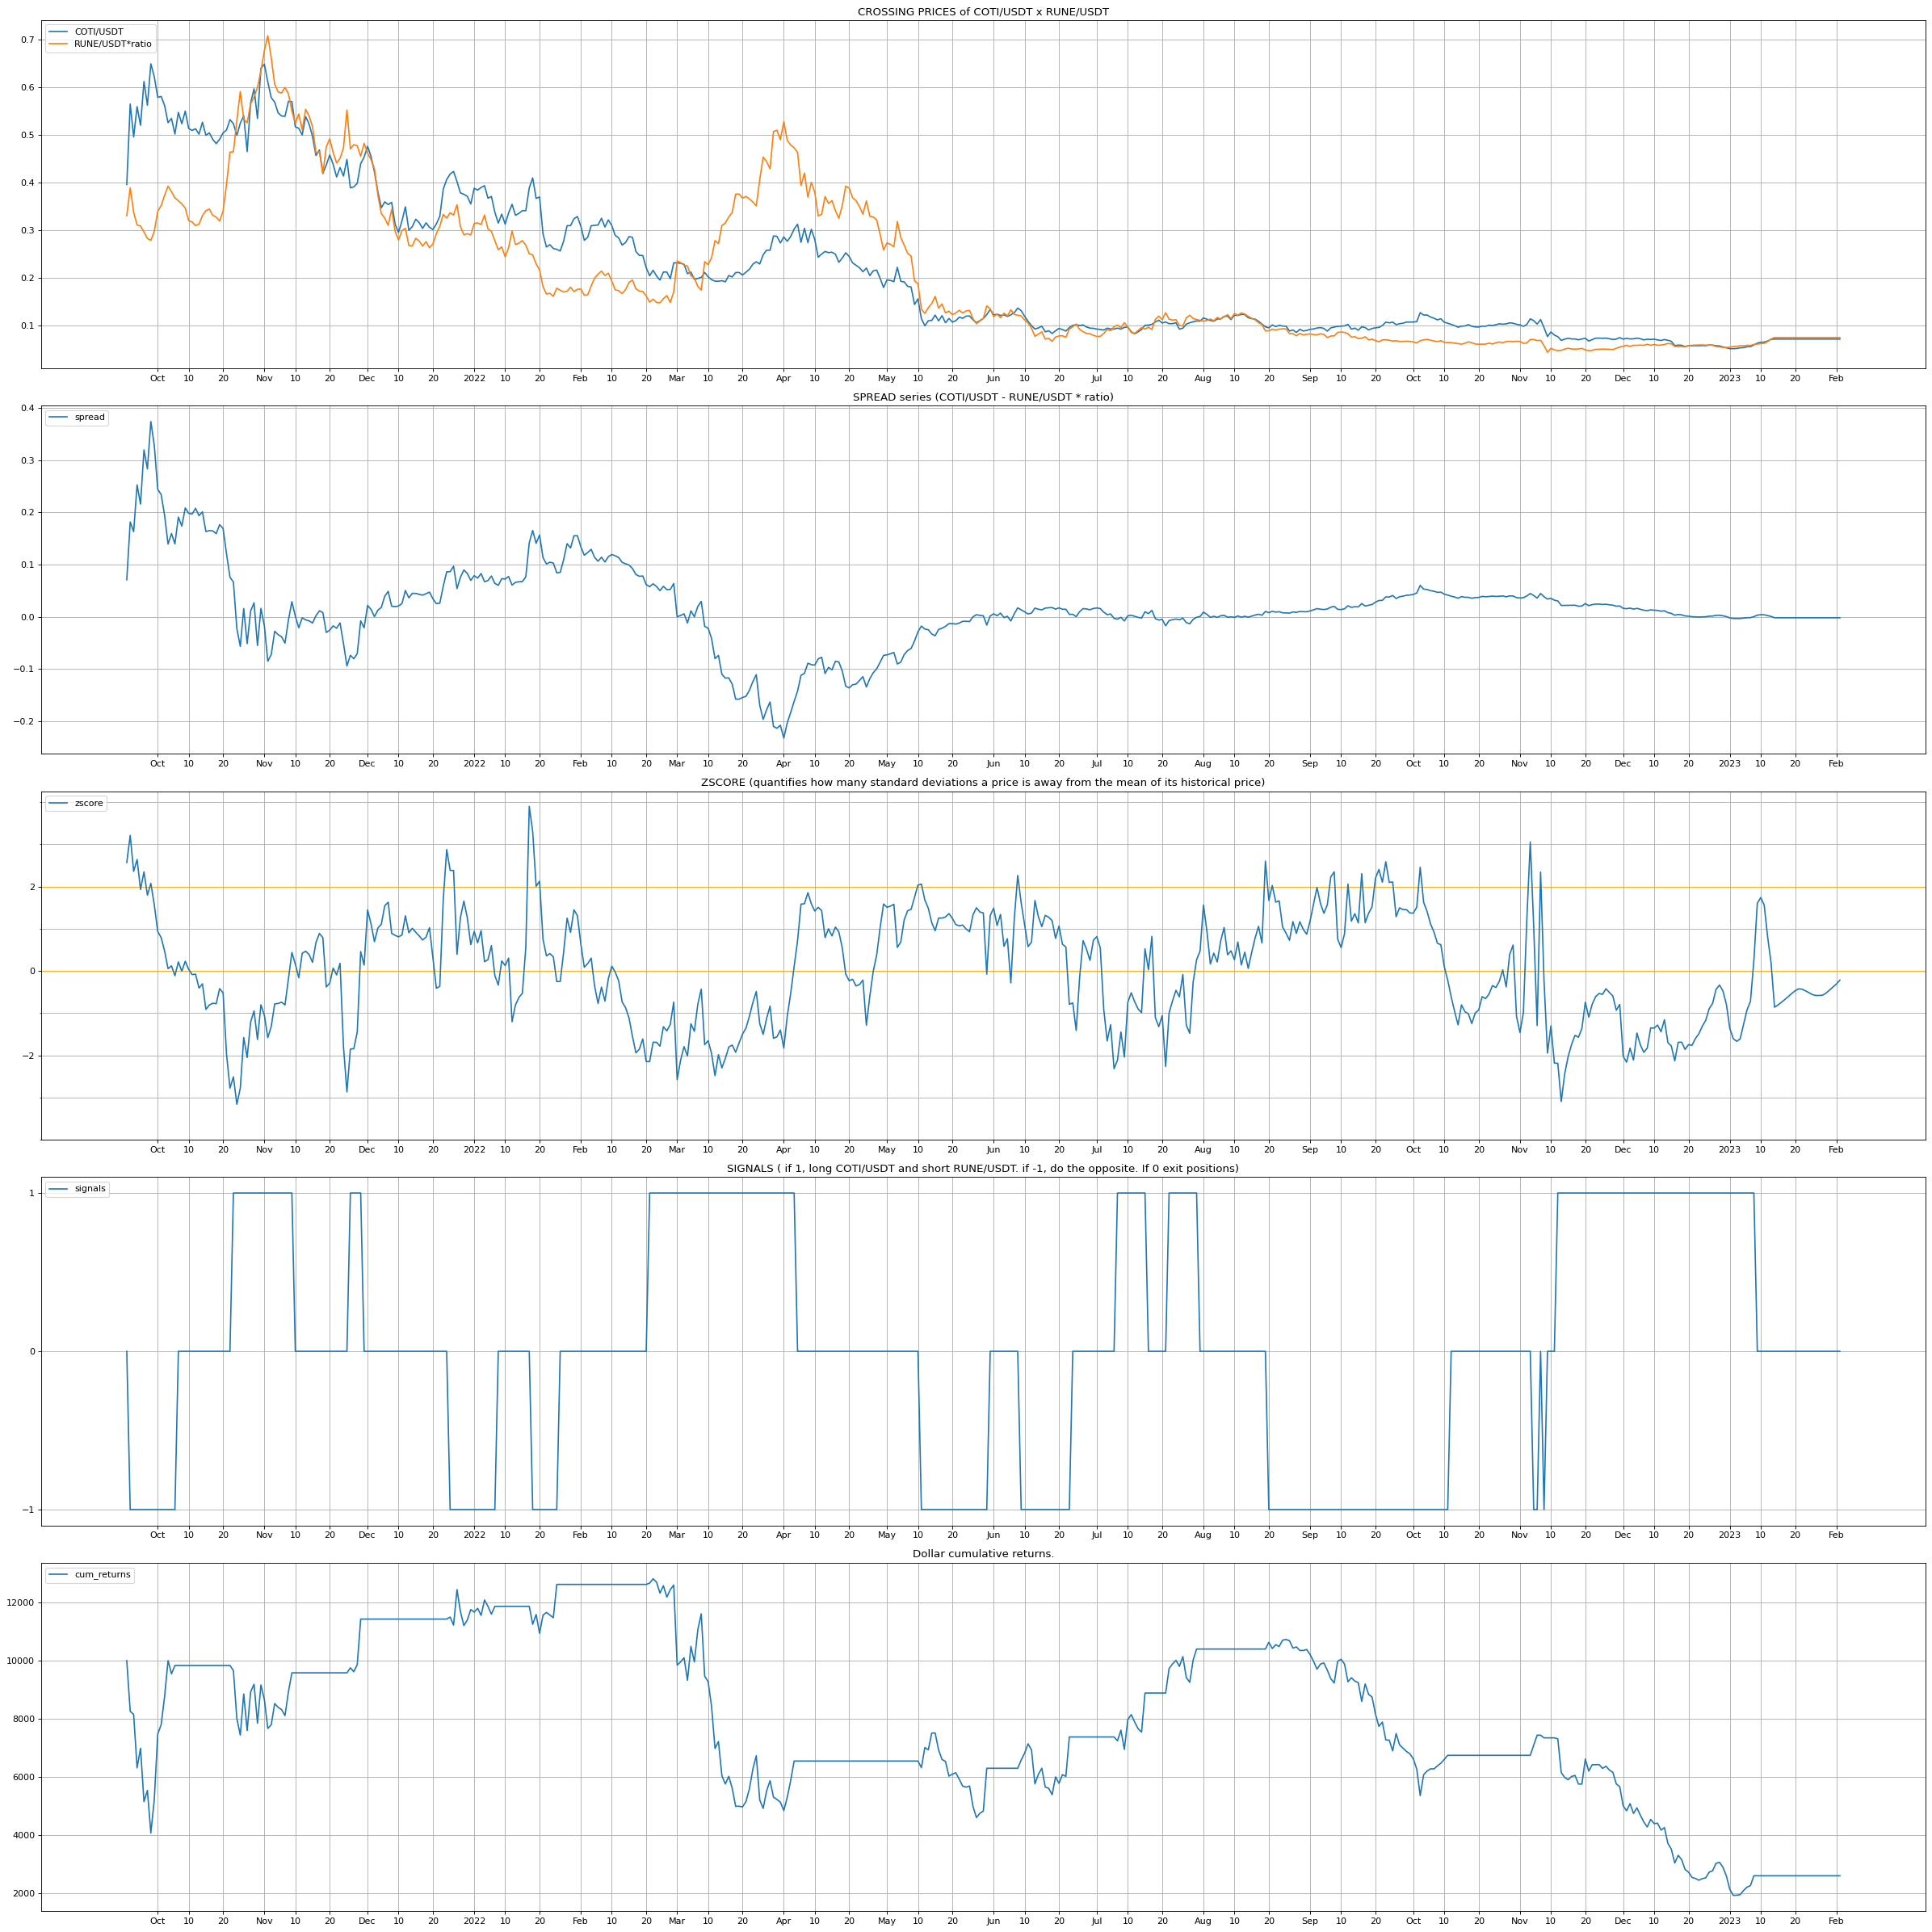

,COTI/USDT,RUNE/USDT,spread,zscore,signals,log_returns1,log_returns2,log_returns_total,simple_returns,dollar_returns,cum_returns
time,,,,,,,,,,,
2021-09-22,0.3955,7.735,0.070831,2.569660,0.0,0.000000,-0.000000,0.000000,0.000000,0.000000,10000.000000
2021-09-23,0.5643,9.112,0.181833,3.212917,-1.0,-0.355435,0.163837,-0.191598,-0.174362,-1743.617007,8256.382993
2021-09-24,0.4952,7.911,0.163143,2.360525,-1.0,0.130624,-0.141338,-0.010714,-0.010657,-106.565389,8149.817604
2021-09-25,0.5587,7.283,0.253003,2.640932,-1.0,-0.120651,-0.082711,-0.203362,-0.184017,-1840.174148,6309.643456
2021-09-26,0.5197,7.232,0.216144,1.931610,-1.0,0.072361,-0.007027,0.065334,0.067515,675.151866,6984.795321
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-29,0.0719,1.762,-0.002058,-0.524443,0.0,0.000000,-0.000000,0.000000,0.000000,0.000000,2594.720622
2023-01-30,0.0719,1.762,-0.002058,-0.451771,0.0,0.000000,-0.000000,0.000000,0.000000,0.000000,2594.720622
2023-01-31,0.0719,1.762,-0.002058,-0.378711,0.0,0.000000,-0.000000,0.000000,0.000000,0.000000,2594.720622


In [9]:
output_df = backtest.plot('COTI/USDT', 'RUNE/USDT')
output_df